In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel

In [96]:
# Load dataset
credit_card_data = pd.read_csv('creditcard1.csv', encoding='latin-1')

In [97]:
# Display first 5 rows of the dataset
print(credit_card_data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [98]:
# Dataset information
print(credit_card_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53571 entries, 0 to 53570
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    53571 non-null  int64  
 1   V1      53571 non-null  float64
 2   V2      53571 non-null  float64
 3   V3      53571 non-null  float64
 4   V4      53571 non-null  float64
 5   V5      53571 non-null  float64
 6   V6      53571 non-null  float64
 7   V7      53571 non-null  float64
 8   V8      53571 non-null  float64
 9   V9      53571 non-null  float64
 10  V10     53571 non-null  float64
 11  V11     53571 non-null  float64
 12  V12     53571 non-null  float64
 13  V13     53571 non-null  float64
 14  V14     53571 non-null  float64
 15  V15     53571 non-null  float64
 16  V16     53571 non-null  float64
 17  V17     53571 non-null  float64
 18  V18     53571 non-null  float64
 19  V19     53571 non-null  float64
 20  V20     53571 non-null  float64
 21  V21     53571 non-null  float64
 22

In [99]:
# Checking the number of missing values in each column
print(credit_card_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [100]:
# Distribution of legit transactions & fraudulent transactions
print(credit_card_data['Class'].value_counts())

Class
0.0    53417
1.0      153
Name: count, dtype: int64


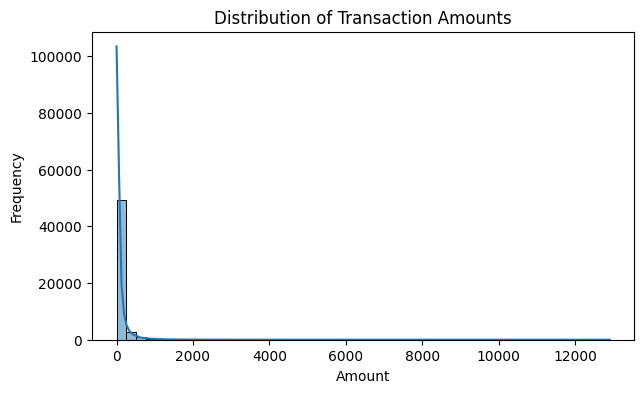

In [101]:
# Histogram for transaction amounts
plt.figure(figsize=(7, 4))
sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

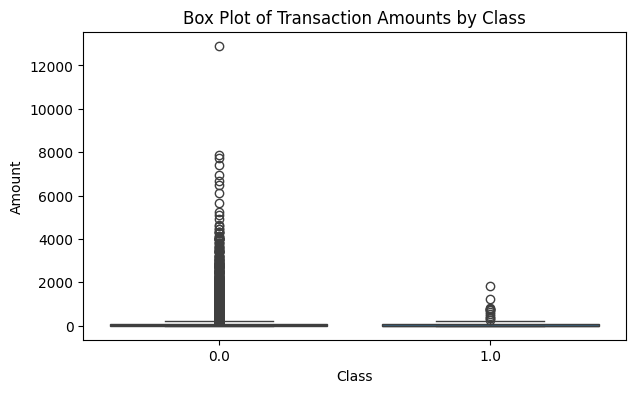

In [102]:
# Box plot for transaction amounts by Class
plt.figure(figsize=(7,4))
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.title('Box Plot of Transaction Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

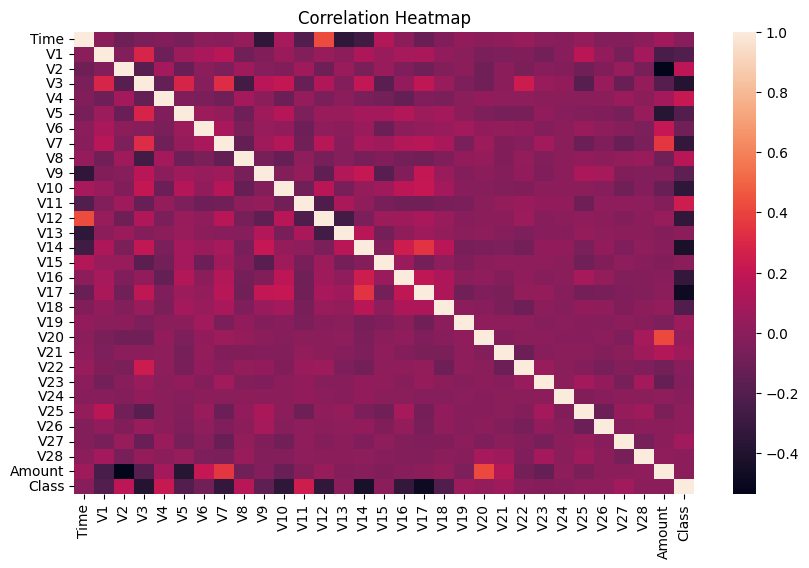

In [103]:
# Correlation heatmap
correlation_matrix = credit_card_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [104]:
# Statistical measures of the data
print(credit_card_data.groupby('Class').mean())

              Time        V1        V2         V3        V4        V5  \
Class                                                                   
0.0    30011.81811 -0.222505 -0.014659   0.722511  0.163565 -0.242775   
1.0    27472.24183 -7.468948  5.326389 -10.100308  5.793812 -5.528864   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0.0    0.109604 -0.097131  0.042665  0.104805  ...  0.046251 -0.031568   
1.0   -2.230554 -7.865700  3.617647 -3.492917  ...  0.455720  0.891045   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0.0   -0.106396 -0.038408  0.008094  0.134794  0.019825  0.002289  0.003902   
1.0   -0.218399 -0.277419 -0.084305  0.240593  0.136258  0.586389  0.028185   

          Amount  
Class             
0.0    94.251260  
1.0    97.616013  

[2 rows x 30 col

In [105]:
# Compare the values for both transactions
print(credit_card_data.groupby('Class').mean())

              Time        V1        V2         V3        V4        V5  \
Class                                                                   
0.0    30011.81811 -0.222505 -0.014659   0.722511  0.163565 -0.242775   
1.0    27472.24183 -7.468948  5.326389 -10.100308  5.793812 -5.528864   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0.0    0.109604 -0.097131  0.042665  0.104805  ...  0.046251 -0.031568   
1.0   -2.230554 -7.865700  3.617647 -3.492917  ...  0.455720  0.891045   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0.0   -0.106396 -0.038408  0.008094  0.134794  0.019825  0.002289  0.003902   
1.0   -0.218399 -0.277419 -0.084305  0.240593  0.136258  0.586389  0.028185   

          Amount  
Class             
0.0    94.251260  
1.0    97.616013  

[2 rows x 30 col

In [106]:
# Separate the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)

X = new_dataset.drop(columns=['Class'], axis=1)
Y = new_dataset['Class']

In [107]:
# Normalization and Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [108]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

In [109]:
# Feature selection
model = RandomForestClassifier()
selector = SelectFromModel(model)
selector.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [110]:
# Selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V17'], dtype='object')


In [86]:
# Apply feature selection to train and test sets SMOTE
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [87]:
#logistic reg
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
predictions_lr_all = model_lr.predict(X_test)
accuracy_lr_all = accuracy_score(predictions_lr_all, Y_test)

model_lr.fit(X_train_selected, Y_train)
predictions_lr_selected = model_lr.predict(X_test_selected)
accuracy_lr_selected = accuracy_score(predictions_lr_selected, Y_test)


In [88]:
# Decision Tree Classifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, Y_train)
predictions_dtc_all = model_dtc.predict(X_test)
accuracy_dtc_all = accuracy_score(predictions_dtc_all, Y_test)

model_dtc.fit(X_train_selected, Y_train)
predictions_dtc_selected = model_dtc.predict(X_test_selected)
accuracy_dtc_selected = accuracy_score(predictions_dtc_selected, Y_test)

In [89]:
# Random Forest Classifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, Y_train)
predictions_rfc_all = model_rfc.predict(X_test)
accuracy_rfc_all = accuracy_score(predictions_rfc_all, Y_test)

model_rfc.fit(X_train_selected, Y_train)
predictions_rfc_selected = model_rfc.predict(X_test_selected)
accuracy_rfc_selected = accuracy_score(predictions_rfc_selected, Y_test)

In [90]:
# Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier()
model_gbc.fit(X_train, Y_train)
predictions_gbc_all = model_gbc.predict(X_test)
accuracy_gbc_all = accuracy_score(predictions_gbc_all, Y_test)

model_gbc.fit(X_train_selected, Y_train)
predictions_gbc_selected = model_gbc.predict(X_test_selected)
accuracy_gbc_selected = accuracy_score(predictions_gbc_selected, Y_test)

In [91]:
# Support Vector Classifier
model_svc = SVC()
model_svc.fit(X_train, Y_train)
predictions_svc_all = model_svc.predict(X_test)
accuracy_svc_all = accuracy_score(predictions_svc_all, Y_test)

model_svc.fit(X_train_selected, Y_train)
predictions_svc_selected = model_svc.predict(X_test_selected)
accuracy_svc_selected = accuracy_score(predictions_svc_selected, Y_test)

In [92]:
# K-Nearest Neighbors Classifier
model_knc = KNeighborsClassifier()
model_knc.fit(X_train, Y_train)
predictions_knc_all = model_knc.predict(X_test)
accuracy_knc_all = accuracy_score(predictions_knc_all, Y_test)

model_knc.fit(X_train_selected, Y_train)
predictions_knc_selected = model_knc.predict(X_test_selected)
accuracy_knc_selected = accuracy_score(predictions_knc_selected, Y_test)

In [94]:
# Sort the results DataFrame by 'Accuracy (Selected Features)' column in descending order
results_sorted_selected = results.sort_values(by='Accuracy (Selected Features)', ascending=False)

# Sort the results DataFrame by 'Accuracy (All Features)' column in descending order
results_sorted_all = results.sort_values(by='Accuracy (All Features)', ascending=False)

# Print the best classifier based on selected features (first row in the sorted DataFrame)
best_classifier_selected = results_sorted_selected.iloc[0]['Model']
best_accuracy_selected = results_sorted_selected.iloc[0]['Accuracy (Selected Features)']

# Print the best classifier based on all features (first row in the sorted DataFrame)
best_classifier_all = results_sorted_all.iloc[0]['Model']
best_accuracy_all = results_sorted_all.iloc[0]['Accuracy (All Features)']

print(f"The best classifier based on selected features is {best_classifier_selected} with an accuracy of {best_accuracy_selected:.2f}")
print(f"The best classifier based on all features is {best_classifier_all} with an accuracy of {best_accuracy_all:.2f}")

print("\nResults sorted by accuracy (Selected Features):")
print(results_sorted_selected)

print("\nResults sorted by accuracy (All Features):")
print(results_sorted_all)


The best classifier based on selected features is Gradient Boosting with an accuracy of 0.98
The best classifier based on all features is Logistic Regression with an accuracy of 0.98

Results sorted by accuracy (Selected Features):
                 Model  Accuracy (All Features)  Accuracy (Selected Features)
3    Gradient Boosting                 0.976744                      0.984496
0  Logistic Regression                 0.976744                      0.976744
2        Random Forest                 0.976744                      0.976744
4                  SVC                 0.976744                      0.976744
5                  KNN                 0.937984                      0.976744
1        Decision Tree                 0.953488                      0.953488

Results sorted by accuracy (All Features):
                 Model  Accuracy (All Features)  Accuracy (Selected Features)
0  Logistic Regression                 0.976744                      0.976744
2        Random Forest